# Jupyter notebook template

This is a template file to start from.

 - First, import some stuff

In [45]:
#Annoying folder stuff
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import plotting and numpy
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Import vortex panel and boundary layer functions
from vortexpanel import VortexPanel as vp
from vortexpanel import BoundaryLayer as bl

 - Then you can do whatever you want by typing, coding, or adding equations
 
$$ E = mc^2 $$

In [46]:
# This is a code cell
print([i**2 for i in range(10)])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Use help() to gain info on the functions

In [47]:
help(vp.panelize)

Help on function panelize in module vortexpanel.VortexPanel:

panelize(x, y)
    Create a PanelArray from a set of points
    
    Inputs:
    x,y    -- the x and y location of the panel end points
    
    Outputs:
    A PanelArray object
    
    Note:
    The first and last point should match for a
    closed shape.



Example on how to use vp.panelize()

(-0.05, 1.05, -0.05, 1.05)

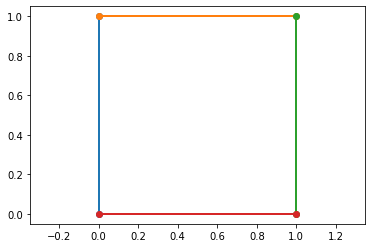

In [48]:
x = [0,0,1,1,0]
y = [0,1,1,0,0]
square = vp.panelize(x,y)
square.plot(style='o-')
plt.axis('equal')

In [49]:
help(vp.PanelArray.plot)


Help on function plot in module vortexpanel.VortexPanel:

plot(self, style='k')
    Plot the PanelArray panels
    
    Inputs:
    style -- a string defining the matplotlib style
    
    Example:
    circle = vp.make_circle(N=32) # make a circle PanelArray
    circle.plot(style='o-')       # plot the geometry



Personal Attempt on making a circle

In [50]:
def make_circle(radius, n):
    wedge_angle = 2*np.pi/(n)
    x = []
    y = []
    for i in range(n):
        x.append(radius*np.sin(i*wedge_angle))
        y.append(radius*np.cos(i*wedge_angle))
    x.append(x[0])
    y.append(y[0])
    return vp.panelize(x,y)

    

(-1.1, 1.1, -1.1, 1.1)

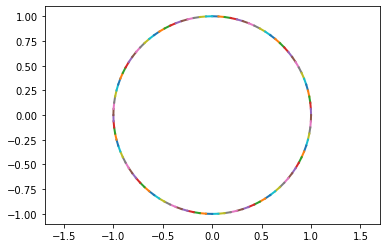

In [51]:
circle = make_circle(radius=1, n=100)
circle.plot(style = '-')
plt.axis('equal')

Gabe's solution to making a circle

(-1.1, 1.1, -1.1, 1.1)

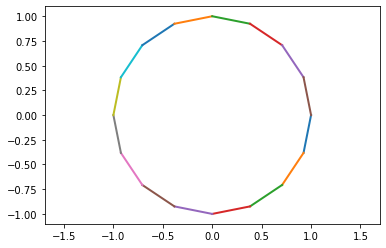

In [56]:
def make_circle(N, radius=1):
    theta=np.linspace(2*np.pi,0,N+1)
    x = radius*np.cos(theta)
    y = radius*np.sin(theta)
    return vp.panelize(x,y)

circle=make_circle(N=16)
circle.plot(style='-')
plt.axis('equal')